# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt
import random

df = pd.read_csv('data/human_body_temperature.csv')

<font color='green'>
    1. Is the distribution of body temperatures normal?
</font>

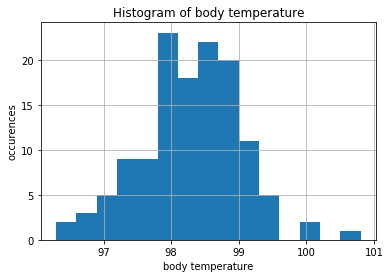

In [2]:
# plotting histogram of temperature data

_ = df.temperature.hist(bins=15)
_ = plt.xlabel('body temperature')
_ = plt.ylabel('occurences')
_ = plt.title('Histogram of body temperature')
plt.show()

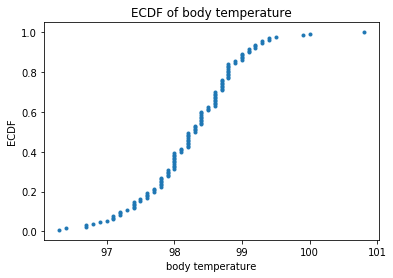

In [3]:
# plotting ECDF of temperature data

x = np.sort(df.temperature)
y = np.arange(1, len(x)+1) / len(x)

# normal = stats.norm(loc=0, scale=1)
# x_theor = np.linspace(x[0], x[-1], 1000)
# y_theor = normal.cdf(x_theor)

_ = plt.plot(x, y, marker='.', linestyle='none', label='Empirical CDF')
# _ = plt.plot(x_theor, y_theor, marker='.', linestyle='none', label='Theoretical CDF')
_ = plt.xlabel('body temperature')
_ = plt.ylabel('ECDF')
_ = plt.title('ECDF of body temperature')
plt.show()

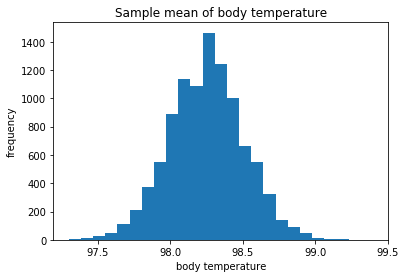

In [4]:
# applying central limit theorem to check for normality

list = []

for i in range(10000):
    df_sample = df.temperature.sample(n=8, replace=True)
    list.append(df_sample.mean())

_ = plt.hist(list, bins=25)
_ = plt.xlabel('body temperature')
_ = plt.ylabel('frequency')
_ = plt.title('Sample mean of body temperature')
plt.show()

<font color='blue'>
Based on the ECDF and graph sample means of body temperature, the  distribution is normal.
</font>

<font color='green'>
    2. Is the sample size large? Are the observations independent?
</font>

<font color='blue'>
To determine if gender and body temperature are independent of each other, we will state our null and alternative hypothesis:<br><br>
H0: There is no statistically significant relationship between gender and body temperature.<br>
H1: There is a statistically significant relationship between gender and body temperature.<br>
</font>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [6]:
# creating a column for temperature category
def process_temperature(df):
    cut_points = [96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100, 1000]
    label_names = ['96 - 96.5 F', '96.5 - 97 F', '97 - 97.5 F', '97.5 - 98 F', '98 - 98.5 F', '98.5 - 99 F', '99 - 99.5 F', '99.5 - 100 F', '100 F +']
    df['temperature_category'] = pd.cut(df.temperature, cut_points, labels=label_names)
    return df

data = process_temperature(df)
temp_by_gender = data[['gender', 'temperature_category']]

In [7]:
# creating contingency table

contingency_table = pd.crosstab(temp_by_gender.gender, temp_by_gender.temperature_category, margins=True)
contingency_table

temperature_category,96 - 96.5 F,96.5 - 97 F,97 - 97.5 F,97.5 - 98 F,98 - 98.5 F,98.5 - 99 F,99 - 99.5 F,99.5 - 100 F,100 F +,All
gender,,,,,,,,,,
F,1,2,3,14,16,20,6,2,1,65
M,1,3,11,16,14,15,5,0,0,65
All,11,30,35,14,5,30,2,2,1,130


In [8]:
# calculating chi-squared statistic and degrees of freedom to determine if we can reject null hypothesis

f_obs = np.append(contingency_table.iloc[0][0:9].values, contingency_table.iloc[1][0:9].values)

row_sum = contingency_table.iloc[0:2,9].values
col_sum = contingency_table.iloc[2,0:9].values

total = contingency_table.loc['All', 'All']
f_expected = []
for j in range(2):
    for i in col_sum:
        f_expected.append(i * row_sum[j]/total)
        
chi_squared_statistic = ((f_obs - f_expected)**2/f_expected).sum()
print('Chi-squared Statistic:', chi_squared_statistic.round(2))

dof = (len(row_sum)-1)*(len(col_sum)-1)
print('Degrees of freedom:', dof)

Chi-squared Statistic: 232.7
Degrees of freedom: 8


<font color='blue'>
Referring to the chi-squared distribution table, the cut off for an alpha of 0.05 with 8 degrees of freedom is 15.507.  Our value of 232.7 exceeds this value, indicating that we can reject the null hypothesis and accept that there is a statistically significant relationship between gender and body temperature.
</font>

<font color='green'>
    3. Is the true population mean really 98.6 degrees F?<br>
    - First, try a bootstrap hypothesis test.<br>
- Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?<br>
- In this situation, is it appropriate to use the  t  or  z  statistic?<br>
- Now try using the other test. How is the result be different? Why?
</font>

In [9]:
# bootstrap sampling

bs_sample = np.random.choice(df.temperature, size=100000)
print('Body temperature mean (bootstrap):', np.mean(bs_sample).round(2))
print('Body temperature std dev (bootstrap):', np.std(bs_sample).round(2))

Body temperature mean (bootstrap): 98.25
Body temperature std dev (bootstrap): 0.73


Confidence interval: [98.12076923 98.37384615]


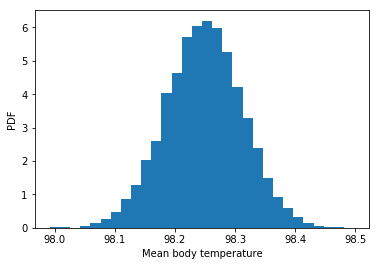

In [10]:
# defining function for bootstrap replicate
def bootstrap_replicate(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

# bootstrap sampling of temperature mean
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bootstrap_replicate(df.temperature, np.mean)

_ = plt.hist(bs_replicates, bins=30, density=True)
_ = plt.xlabel('Mean body temperature')
_ = plt.ylabel('PDF')

conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('Confidence interval:', conf_int)

<font color='blue'>
Using bootstrap hypothesis testing, we see that 98.6F falls outside of the 95% CI of the sampled body temperature PDF [98.12, 98.37].
</font>

<font color='blue'>
A one sample test is used when we are testing a sample mean against a known or hypothesized population value.  A two sample test is used when we are comparing if the differences between two groups are significantly different.  For this problem, we would use a one sample test as we are attempting to determine whether the sampled body temperature mean is the generally accepted value of 98.6∘ F.<br><br>
    
Additionally, this situation would call for using a z statistic.  Z statistics are used when there is a large sample size (greater than 30).  T statistics are generally used when there is a smaller sample size (less than 30).
</font>

H0: The mean body temperature is 98.6F
H1: The mean body temperature is not 98.6F

alpha = 0.05

In [11]:
# function for one sample z-test statistic
def z_score_1s(pop_mean, samp_mean, samp_std, n):
    if n > 30:
        return ((samp_mean - pop_mean)/(samp_std/np.sqrt(n)))

print('Z-score:', z_score_1s(98.6, df.temperature.mean(), df.temperature.std(), len(df.temperature)).round(2))

Z-score: -5.45


<font color='blue'>
Using a one sample, two tailed Z test, we see that the resulting z_score of -5.45 falls in the rejection region outside of [-1.96, 1.96].  Therefore, we can reject the null hypothesis and accept that the mean body temperature is not 98.6F.
</font>

<font color='green'>
    4. Draw a small sample of size 10 from the data and repeat both frequentist tests.<br>
    - Which one is the correct one to use?<br>
- What do you notice? What does this tell you about the difference in application of the t  and z statistic?
</font>

Confidence interval: [98.132 98.313]


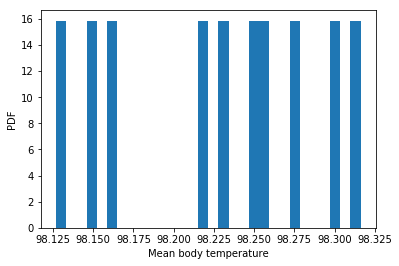

In [12]:
bs_replicates = np.empty(10)

for i in range(10):
    bs_replicates[i] = bootstrap_replicate(df.temperature, np.mean)
    
_ = plt.hist(bs_replicates, bins=30, density=True)
_ = plt.xlabel('Mean body temperature')
_ = plt.ylabel('PDF')

conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('Confidence interval:', conf_int.round(3))

In [13]:
# calculating t-score with a sample size of 10

t_score_df = df.temperature.sample(n=10)

def t_score(pop_mean, samp_mean, samp_std, n):
    if n < 30:
        return ((samp_mean - pop_mean)/(samp_std/np.sqrt(n)))

print('t-score:', t_score(98.6, t_score_df.mean(), t_score_df.std(), len(t_score_df)).round(3))

t-score: -1.645


<font color='green'>
    5. At what temperature should we consider someone's temperature to be "abnormal"?<br>
    - As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.<br>
- Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
</font>

In [14]:
# calculating margin of error (ME = z * std/sqrt(n])
mar_err = 1.96 * df.temperature.std() / np.sqrt(len(df.temperature))
print('Margin of error:', mar_err.round(4), 'degrees F')

Margin of error: 0.126 degrees F


<font color='blue'> 
From problem 3, for an alpha = 0.05, we obtained a confidence interval of [98.12, 98.37] using bootstrap approach.
</font>

<font color='green'>
    6. Is there a significant difference between males and females in normal temperature?<br>
- What testing approach did you use and why?<br>
- Write a story with your conclusion in the context of the original problem.
</font>

In [15]:
# function for two sample z-test statistic
def z_score_2s(samp_mean1, samp_mean2, samp_std1, samp_std2, n1, n2):
    if (n1 > 30) and (n2 > 30):
        return (samp_mean1 - samp_mean2)/(np.sqrt(((samp_std1**2)/n1)+((samp_std2**2)/n2)))

In [17]:
# calculating p-value for male and female temperature
import scipy.stats as st

male_df = df[df.gender == 'M']
female_df = df[df.gender == 'F']

stat, pval = st.ttest_ind(male_df.temperature, female_df.temperature)
print('P-value:', pval.round(3))


P-value: 0.024


<font color='blue'>
From the calculations, the p-value is .024, which is below the significance level of 0.05.  This indicates that we can reject the null hypothesis and that male and female normal temperatures are significantly different.
</font>